In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 
import RIS_gravity_inversion.utils as utils

import numpy as np
import pandas as pd
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
%load_ext snakeviz

/home/tankerma/miniconda/envs/grav_inv2/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
zoom = 100e3
n_shift = 0#150e3#600e3
w_shift = 0#-150e3#250e3
buffer = 200e3

# starting inversion region is 1,000km x 1,000km
e_inv = -580000+zoom+w_shift
w_inv = 420000-zoom+w_shift
n_inv = -1420000+zoom-n_shift
s_inv = -420000-zoom-n_shift

inv_reg = [e_inv, w_inv, n_inv, s_inv]
e_buff, w_buff, n_buff, s_buff = int(e_inv-buffer), int(w_inv+buffer), int(n_inv-buffer), int(s_inv+buffer)
buffer_reg = [e_buff, w_buff, n_buff, s_buff]
buffer_reg_str=f'{e_buff}/{w_buff}/{n_buff}/{s_buff}'
inv_reg_ll = "-180/180/-90/-71"

fig_height = 80
fig_width = fig_height*(w_inv-e_inv)/(s_inv-n_inv)

inv_ratio = (s_inv-n_inv)/(fig_height/1000)
buffer_ratio = (s_buff-n_buff)/(fig_height/1000)

inv_proj = f"x1:{inv_ratio}"
buffer_proj = f"x1:{buffer_ratio}"

inv_proj_ll = f"s0/-90/-71/1:{inv_ratio}"
buffer_proj_ll = f"s0/-90/-71/1:{buffer_ratio}"

layers_list = pd.Series([
             'ice',
             'water',
             'bathymetry',
            #  'basement',
            #  'moho'
])

spacing_list = pd.Series([
                20e3,
                20e3,
                20e3,
                # 10e3,
                # 20e3
])

rho_list = pd.Series([
            920, #890 to 917 from Muto et al. 2013
            1030, #from Muto et al. 2013
            2300,
            # 2670,
            # 3300
])

grav_spacing = 20e3

active_layer='bathymetry'

fname_list = pd.Series([
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            # 'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc'
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc'
])

# forward_layers = {k:v for k,v in layers.items() if k not in ['ice']}

# inv_reg_ll = inv.GMT_reg_xy_to_ll(inv_reg)
# buffer_reg_ll = inv.GMT_reg_xy_to_ll(buffer_reg)

#  Import layers

filtering and resampling ice from 1000m to 20000m
filtering and resampling water from 1000m to 20000m
filtering and resampling bathymetry from 1000m to 20000m
ice: 3600 points, elevations:3460m to 0m
water: 3600 points, elevations:3458m to -2250m
bathymetry: 3600 points, elevations:3458m to -3760m
gravity: 18030 points
gravity avg. elevation: 1000
bathymetry control points:8287288


,x,y,Gobs,z
550,-67500.0,-1317500.0,-13.992029,1000.0
551,-62500.0,-1317500.0,-13.595438,1000.0
552,-57500.0,-1317500.0,-12.104958,1000.0
553,-52500.0,-1317500.0,-11.071362,1000.0
554,-47500.0,-1317500.0,-11.223326,1000.0
...,...,...,...,...
19468,-177500.0,-522500.0,-29.551244,1000.0
19469,-172500.0,-522500.0,-42.768432,1000.0
19470,-167500.0,-522500.0,-49.065992,1000.0
19471,-162500.0,-522500.0,-45.534172,1000.0


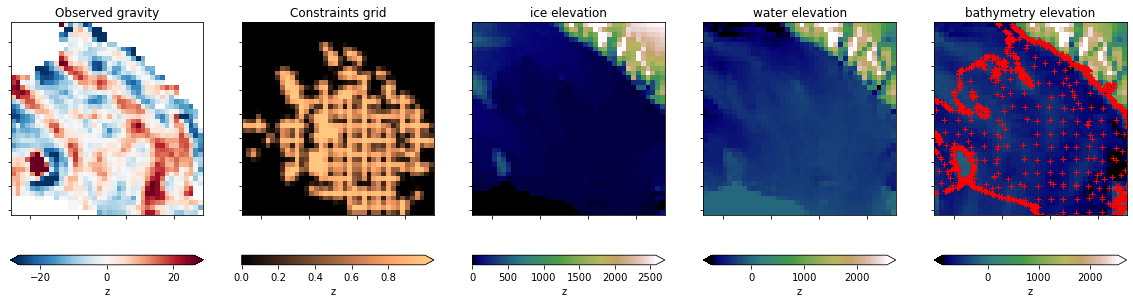

In [3]:
returned = inv.import_layers(
    layers_list, 
    spacing_list, 
    rho_list, 
    fname_list,
    grav_spacing, 
    active_layer,
    buffer_reg,
    inv_reg,
    # grav_file='gravity_data/ant4d_gravity_epsg_5k.nc',
    # grav_file='gravity_data/rosetta.nc',
    # grav_file='gravity_data/rosetta_eq_source_up_continued_Gobs.nc',
    # grav_elev_file='gravity_data/rosetta_eq_source_up_continued_elev.nc',
    constraints=True,
    grav_file='gravity_data/rosetta_eq_source_up_continued.csv',
    constraints_file='constraints_grid/constraints_grid.nc',
    constraints_points='bathymetry_data/bedmachine_RIGGS.csv',
    
    plot=True,
    plot_region=inv_reg
    )
layers, df_grav, constraints_grid, constraints_df, constraints_RIS_df = returned
df_grav

# layers, df_grav, constraints_df, constraints_RIS_df

# Make prism layers

bathymetry top: -245m and bottom: -3760m
water top: 8m andbottom: -245m
ice top: 650m andbottom: 8m


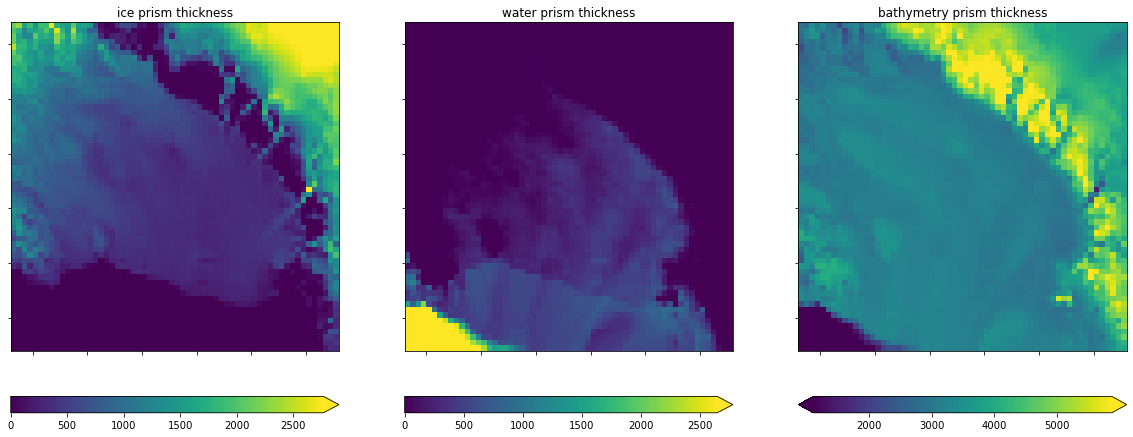

In [4]:
inv.grids_to_prism_layers( 
    layers, 
    plot=True, 
    # plot_region=inv_reg,
    plot_type='2D', 
    buffer_region = buffer_reg,
    ) 

# Forward gravity

finished ice layer
finished water layer
finished bathymetry layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total
count,18030.000000,1.803000e+04,1.803000e+04,18030.0,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04
mean,-90591.514143,-9.836572e+05,-1.008868e-16,1000.0,-1.109755e-15,-6.053209e-16,-3.686152e-14,-3.752990e-14
std,209009.683802,1.884631e+05,1.220752e+01,0.0,5.535020e+00,7.188901e+00,1.207443e+01,8.753242e+00
min,-477500.000000,-1.317500e+06,-6.938894e+01,1000.0,-1.539951e+01,-1.110624e+01,-3.984923e+01,-3.222562e+01
25%,-252500.000000,-1.137500e+06,-7.286439e+00,1000.0,-2.781615e+00,-6.188155e+00,-7.603336e+00,-5.191103e+00
50%,-92500.000000,-9.925000e+05,5.524201e-02,1000.0,-1.184801e+00,7.389203e-02,-2.796089e-01,1.077464e-01
75%,77500.000000,-8.375000e+05,7.360892e+00,1000.0,2.618508e+00,5.370280e+00,6.651052e+00,4.184901e+00
max,317500.000000,-5.225000e+05,7.490039e+01,1000.0,2.201414e+01,1.838742e+01,9.618525e+01,8.540368e+01


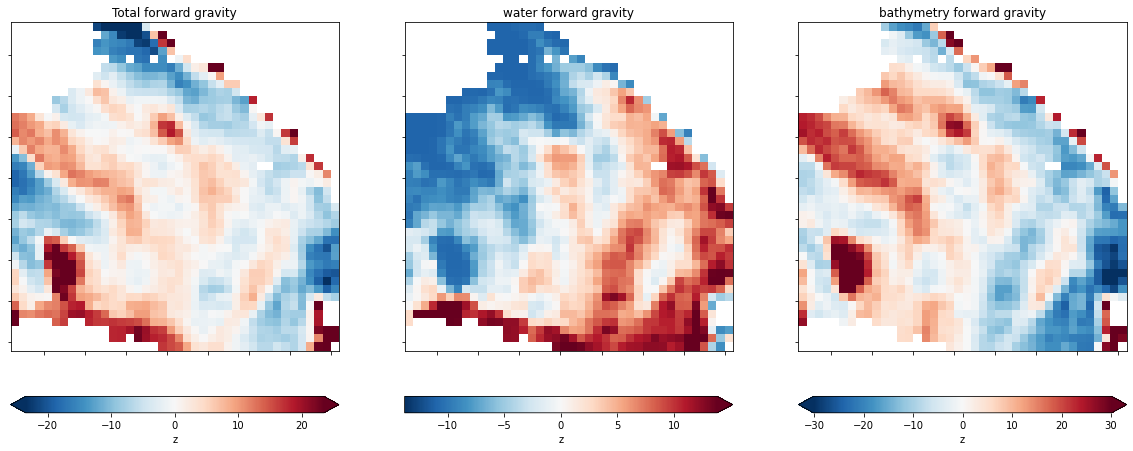

In [5]:
df_forward = inv.forward_grav_layers(
    layers, 
    df_grav,  
    plot=True,
    grav_spacing=grav_spacing,
    inversion_region = inv_reg,
    exclude_layers=['ice'],
    )
df_forward.describe()
# notify

# Anomalies

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,18030.000000,1.803000e+04,1.803000e+04,18030.0,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,18030.000000,18030.000000
mean,-90591.514143,-9.836572e+05,-1.008868e-16,1000.0,-1.109755e-15,-6.053209e-16,-3.686152e-14,-3.752990e-14,1.008868e-15,3.843788e-14,-0.056937,0.056937
std,209009.683802,1.884631e+05,1.220752e+01,0.0,5.535020e+00,7.188901e+00,1.207443e+01,8.753242e+00,1.372855e+01,1.294803e+01,8.843164,7.442622
min,-477500.000000,-1.317500e+06,-6.938894e+01,1000.0,-1.539951e+01,-1.110624e+01,-3.984923e+01,-3.222562e+01,-7.968935e+01,-1.403966e+02,-40.775874,-100.349421
25%,-252500.000000,-1.137500e+06,-7.286439e+00,1000.0,-2.781615e+00,-6.188155e+00,-7.603336e+00,-5.191103e+00,-8.390539e+00,-7.548466e+00,-5.535266,-3.732843
50%,-92500.000000,-9.925000e+05,5.524201e-02,1000.0,-1.184801e+00,7.389203e-02,-2.796089e-01,1.077464e-01,1.271039e+00,5.170220e-01,-0.787312,0.152752
75%,77500.000000,-8.375000e+05,7.360892e+00,1000.0,2.618508e+00,5.370280e+00,6.651052e+00,4.184901e+00,9.027284e+00,8.069345e+00,4.825840,4.267582
max,317500.000000,-5.225000e+05,7.490039e+01,1000.0,2.201414e+01,1.838742e+01,9.618525e+01,8.540368e+01,6.471568e+01,4.552427e+01,23.793478,49.361105


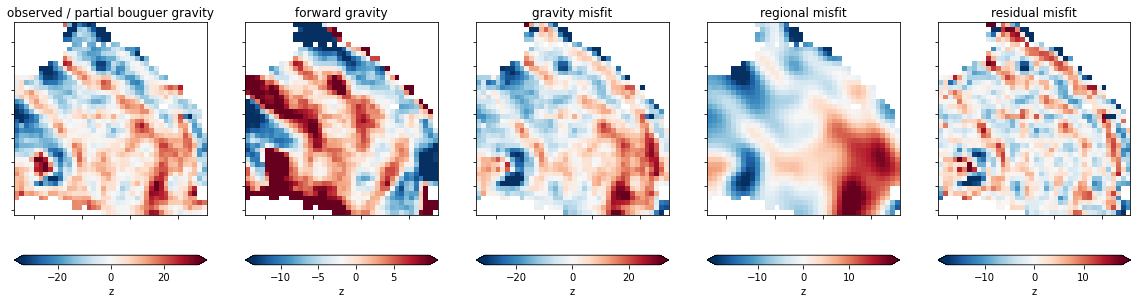

In [9]:
filter='g200e3'
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'filter', 
        filter=filter,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=False,
        # constraints2plot=constraints_RIS_df,
        )
df_anomalies.describe()

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,18030.000000,1.803000e+04,1.803000e+04,18030.0,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,18030.000000,18030.000000
mean,-90591.514143,-9.836572e+05,-1.008868e-16,1000.0,-1.109755e-15,-6.053209e-16,-3.686152e-14,-3.752990e-14,1.008868e-15,3.843788e-14,-0.194888,0.194888
std,209009.683802,1.884631e+05,1.220752e+01,0.0,5.535020e+00,7.188901e+00,1.207443e+01,8.753242e+00,1.372855e+01,1.294803e+01,9.237295,9.686172
min,-477500.000000,-1.317500e+06,-6.938894e+01,1000.0,-1.539951e+01,-1.110624e+01,-3.984923e+01,-3.222562e+01,-7.968935e+01,-1.403966e+02,-50.220462,-93.063484
25%,-252500.000000,-1.137500e+06,-7.286439e+00,1000.0,-2.781615e+00,-6.188155e+00,-7.603336e+00,-5.191103e+00,-8.390539e+00,-7.548466e+00,-5.924530,-5.351517
50%,-92500.000000,-9.925000e+05,5.524201e-02,1000.0,-1.184801e+00,7.389203e-02,-2.796089e-01,1.077464e-01,1.271039e+00,5.170220e-01,-0.615660,0.160596
75%,77500.000000,-8.375000e+05,7.360892e+00,1000.0,2.618508e+00,5.370280e+00,6.651052e+00,4.184901e+00,9.027284e+00,8.069345e+00,4.629089,5.820556
max,317500.000000,-5.225000e+05,7.490039e+01,1000.0,2.201414e+01,1.838742e+01,9.618525e+01,8.540368e+01,6.471568e+01,4.552427e+01,31.123187,48.336737


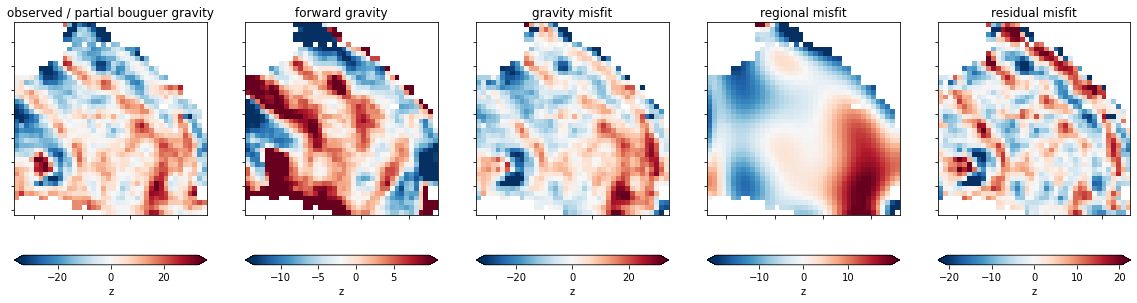

In [8]:
trend=8
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'trend', 
        trend=trend,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=False,
        # constraints2plot=constraints_RIS_df,
        )
df_anomalies.describe()

,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,18030.000000,1.803000e+04,1.803000e+04,18030.0,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,1.803000e+04,18030.000000,18030.000000
mean,-90591.514143,-9.836572e+05,-1.008868e-16,1000.0,-1.109755e-15,-6.053209e-16,-3.686152e-14,-3.752990e-14,1.008868e-15,3.843788e-14,-0.113365,0.113365
std,209009.683802,1.884631e+05,1.220752e+01,0.0,5.535020e+00,7.188901e+00,1.207443e+01,8.753242e+00,1.372855e+01,1.294803e+01,12.180280,6.252580
min,-477500.000000,-1.317500e+06,-6.938894e+01,1000.0,-1.539951e+01,-1.110624e+01,-3.984923e+01,-3.222562e+01,-7.968935e+01,-1.403966e+02,-112.380786,-70.476179
25%,-252500.000000,-1.137500e+06,-7.286439e+00,1000.0,-2.781615e+00,-6.188155e+00,-7.603336e+00,-5.191103e+00,-8.390539e+00,-7.548466e+00,-7.163428,-3.259456
50%,-92500.000000,-9.925000e+05,5.524201e-02,1000.0,-1.184801e+00,7.389203e-02,-2.796089e-01,1.077464e-01,1.271039e+00,5.170220e-01,0.223084,0.064921
75%,77500.000000,-8.375000e+05,7.360892e+00,1000.0,2.618508e+00,5.370280e+00,6.651052e+00,4.184901e+00,9.027284e+00,8.069345e+00,8.475397,3.145056
max,317500.000000,-5.225000e+05,7.490039e+01,1000.0,2.201414e+01,1.838742e+01,9.618525e+01,8.540368e+01,6.471568e+01,4.552427e+01,52.044973,40.583237


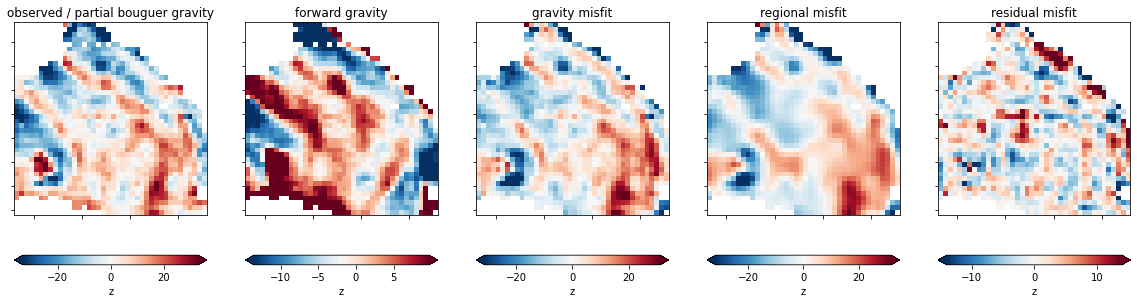

In [11]:
df_anomalies = inv.anomalies(
        layers, 
        df_forward, 
        grav_spacing, 
        'constraints', 
        constraints=constraints_df,
        constraints2plot=constraints_RIS_df,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=False,
        )
df_anomalies.describe()

# Geo inversion

In [ ]:
# %%snakeviz --new-tab
regional_method='constraints'

iter_corrections, df_inversion = inv.geo_inversion(
    active_layer='bathymetry',
    layers=layers, 
    input_grav=df_anomalies, 
    regional_method = regional_method,
    Max_Iterations=3,
    deriv_type='prisms',
    max_layer_change_per_iter=200,

    apply_constraints = False,
    constraints_grid=constraints_grid,
    exclude_layers=['ice'],

    filter=filter, 
    trend=trend,
    constraints=constraints_df,
    
    buffer_region=buffer_reg,
    grav_spacing = grav_spacing,
    ) 
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 5th trend,: 18m 3s
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 400km filter,: 19m 35s

# 07/27/22, full size, just ROSETTA, 20km res, Ice/Water/Bathy, annulus, 3its, constraints off
# 200km filter. 200km buffer,: 14mins
# 07/27/22, full size, just ROSETTA, 20km res, Ice/Water/Bathy, prisms, 3its, constraints off
# res from 200km filter. 200km buffer,: 2 mins

# 07/28/22, full size, just ROSETTA, 10km res, Ice/Water/Bathy, prisms, 3its, constraints off
# res from constraints. 200km buffer, 53 mins
notify

In [ ]:
inv.plot_inversion_results(
    df_inversion,
    'bathymetry',
    grav_spacing,
    'epsg:3031',
    layers,
    iter_corrections,

    plot_constraints = True,
    constraints = constraints_RIS_df,
)

# Density inversion

In [ ]:
# density_inversion(density_layer='bathymetry', plot=True) #10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify